In [1]:
%matplotlib inline

In [2]:
import pickle as pkl
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from helpers import infected_nodes


In [31]:
graph = 'p2p'
graph_suffix=''

if graph == 'lattice-1024':
    min_size, max_size = 40, 80
elif graph in {'grqc','fb'}:
    min_size, max_size = 40, 120
elif graph in {'p2p'}:
    min_size, max_size = 80, 160

In [32]:
# obs_fractions=[0.25, 0.5, 0.75]
obs_fractions=['leaves']

In [33]:
bins = np.linspace(0, 1.0, 11)    

In [34]:
def get_freqs(probas_list, bins):
    probas = pd.Series(probas_list).as_matrix()
    ys, _ = np.histogram(probas, bins=bins)    
    return ys    

In [35]:
def get_freqs_from_config(obs_fraction, root_sampling_method):
    # inf_probas_path = "outputs/inf_probas/{}-s0.02-q{}.pkl".format(graph, obs_fraction)
    inf_probas_path = "outputs/inf_probas/{}-s{}-{}-o{}.pkl".format(graph, min_size, max_size, obs_fraction)

    stuff = pkl.load(open(inf_probas_path, 'rb'))
    # print(stuff.keys())
    inf_nodes_probas_list = []
    uninf_nodes_probas_list = []
    for row in stuff[root_sampling_method]:
        c, obs = row['c'], row['obs']
        inf_nodes = set(infected_nodes(c))
        inf_nodes -= set(obs)  # only hidden infections
        uninf_nodes = (c < 0).nonzero()[0]

        probas = row['st_naive_probas']
        inf_node_probas = probas[list(inf_nodes)]
        inf_nodes_probas_list += list(inf_node_probas)

        uninf_node_probas = probas[list(uninf_nodes)]
        uninf_nodes_probas_list += list(uninf_node_probas)
    inf_freq = get_freqs(inf_nodes_probas_list, bins)
    uninf_freq = get_freqs(uninf_nodes_probas_list, bins)
    return inf_freq, uninf_freq

In [36]:
def plot_one_config(obs_fraction, root_sampling_method, ax):
    inf_freq, uninf_freq = get_freqs_from_config(obs_fraction, root_sampling_method)
    
    ax.semilogy(bins[1:], inf_freq, '.-', alpha=0.7)
    ax.semilogy(bins[1:], uninf_freq, '.-', alpha=0.7)
    # ax.legend(['infected(hidden)', 'uninfected'])    

In [37]:
mpl.style.use('paper')

1 0


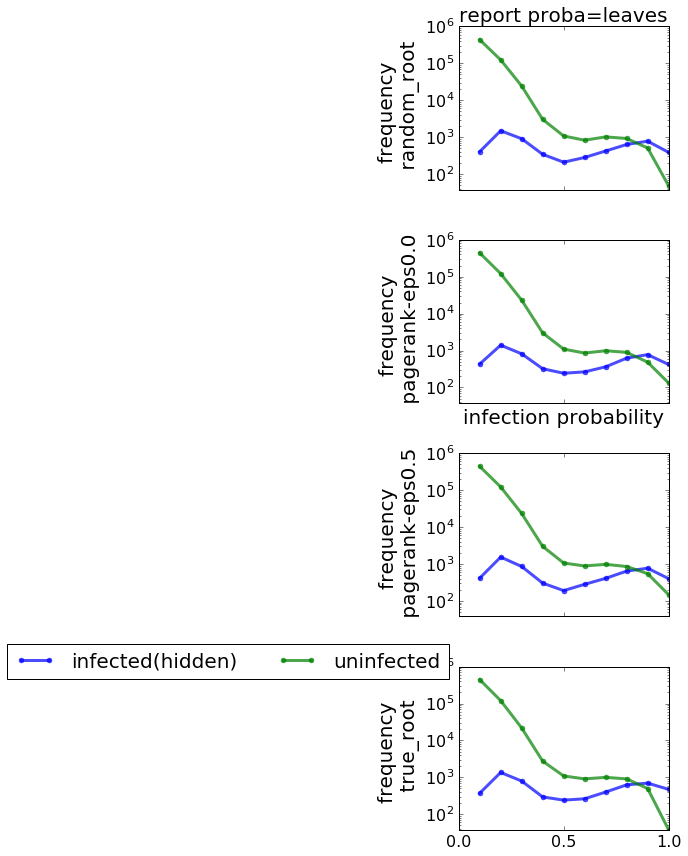

In [38]:
root_sampling_methods = ['random_root', 'pagerank-eps0.0', 'pagerank-eps0.5', 'true_root']
# obs_fractions = [0.25, 0.5, 0.75]
n_row, n_col = len(root_sampling_methods), len(obs_fractions)
width = 3
fig, axes = plt.subplots(n_row, n_col, figsize=((n_col + 0.5) * width, n_row * width),
                         sharex=True,
                         sharey=True)

for i, root_sampling_method in enumerate(root_sampling_methods):
    for j, obs_frac in enumerate(obs_fractions):        
        if len(obs_fractions) == 1:
            ax = axes[i]
        else:
            ax = axes[i, j]
        plot_one_config(obs_frac, root_sampling_method, ax)
        if i == 0:
            ax.set_title('report proba={}'.format(obs_frac))
        if j == 0:
            ax.set_ylabel('frequency \n {}'.format(root_sampling_method))
        if i == 1:
            print(i, j)
            ax.set_xlabel('infection probability')
            ax.set_xticks([0, 0.5, 1.0])
        ax.set_xlim(0, 1.0)
        ax.set_ylim(0, 10e5)
fig.tight_layout()
ax.legend(labels=['infected(hidden)', 'uninfected'], loc="best", ncol=2, bbox_to_anchor=(0,1.2))
fig.savefig('figs/infection-probability/{}.png'.format(graph))

In [ ]:
c = np.histogram(inf_nodes_probas_list) 
print(c)
c = np.histogram(uninf_nodes_probas_list)
print(c)

In [ ]:
c = np.histogram(inf_nodes_probas_list) 
print(c)
c = np.histogram(uninf_nodes_probas_list)
print(c)

In [ ]:
pd.Series(uninf_nodes_probas_list).plot('hist')